# AUTHOR :- VINAY KUMAR KUSHWAHA

## THE SPARK FOUNDATION #(GRIPMAY'22)

## TASK 1 :- PREDICTION USING SUPERVISED ML
    

### In this task we wil predict the percentage of an student based on the no. of study hours. 



### To solve this problem we will use simple linear regression as two variable is involved in this given dataset.

### Dataset_URL = "http://bit.ly/w-data"

### Step 1 - Importing the dataset and required libraries

In [122]:
#Importing the required libraries used in this task
import pandas as pd
import numpy as np   
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
%matplotlib inline

In [123]:
# Reading data from given dataset_url
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [124]:
#Exploring the dataset
#Observing the First 5 values
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [125]:
#Observing the last 5 values
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [126]:
#For infomation regarding dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [127]:
#For finding row and columns
dataset.shape

(25, 2)

In [128]:
#To check the duplicate values
dataset.duplicated().sum()

0

In [129]:
#To check the missing values
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [130]:
dataset.notnull().sum()

Hours     25
Scores    25
dtype: int64

### STEP-2 VISUALIZING THE DATASET

In this step we will observe the relationship between given two variables(i.e. Hours and Percentage score)

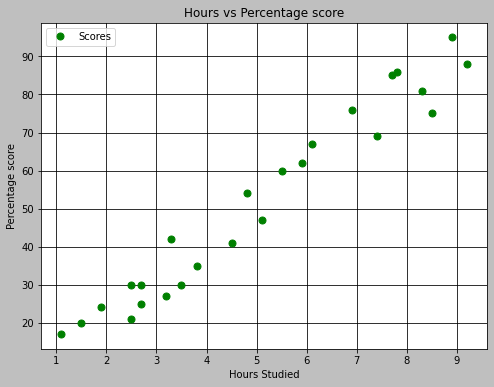

In [131]:
#Plotting the graph between hours and percentage

plt.rcParams["figure.figsize"]= [8,6]
plt.style.use('grayscale')
dataset.plot(x="Hours",y="Scores", style="o", color ="green", markersize= 7)

plt.title("Hours vs Percentage score")
plt.xlabel("Hours Studied")
plt.ylabel('Percentage score')
plt.grid()
plt.show()

In [132]:
#pearson coefficient is used to summarize the strength of linear relation between two variables
dataset.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Step-3 DATA PREPARATION

In the step we will use data into attributes and outputs. And we will split the dataset into training and testing set..

In [133]:
#To divide the data into attibutes 
x = dataset.iloc[:,:-1].values 

In [135]:
y = dataset.iloc[:, -1].values  
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [141]:
#To split the dataset into training and testing set..

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 


## STEP 4- TRAINING THE ALGORITHM

We will use linear regression model by Scikit-Learn library

In [142]:
#By importing LinearRegression we will try to train our model
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 
print("Our algorithm has been trained")

Our algorithm has been trained


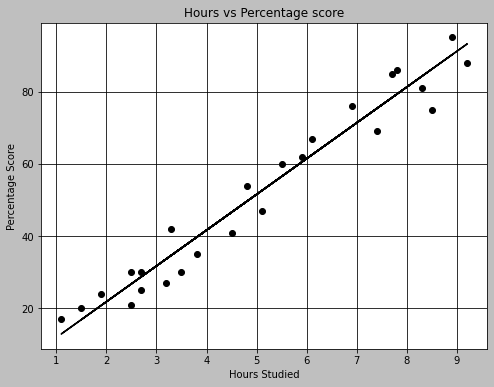

In [138]:
# Plotting the regression line

reg_line = reg.coef_*x +reg.intercept_

plt.title("Hours vs Percentage score")
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Score')
plt.grid()
plt.scatter(x, y)
plt.plot(x, reg_line);
plt.show()

In [143]:
#WE will print the hours testing set
print(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [144]:
#We will predict the percentage by using hour testing set
y_prediction = reg.predict(x_test) 
y_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing the Actual vs predicted values by using our model

In [145]:
#We will compare the values of Actual vs Predicted
z = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})  
z

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/ day?


In [146]:
#According to given question we have to find predicted score for 9.25 hours/day..

HOURS= 9.25
Pred_score = reg.predict([[HOURS]])
print("No of Hours = {}".format(HOURS))
print("Predicted Score = {}".format(Pred_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### If student studies 9.25 hours/day then predicted score will be 93.69

## STEP- 5 MODEL EVALUATION 

For checking the performance of the model we will some metrics like mean absolute error, mean squared error and R2 score.

In [147]:
from sklearn import metrics

print('Mean Absolute Error(MAE):', 
      metrics.mean_absolute_error(y_test, y_prediction)) 

print('Mean Squared Error(MSE):', 
      metrics.mean_squared_error(y_test, y_prediction)) 

print('R^2 Score:', 
      metrics.r2_score(y_test, y_prediction)) 


Mean Absolute Error(MAE): 4.183859899002975
Mean Squared Error(MSE): 21.5987693072174
R^2 Score: 0.9454906892105356


# CONCLUSION:-

### =>This model resembles R^2 (coefficient of determination) = 94.54% with the Mean absolute error (4.18) and Mean squared error (21.59) 

### =>According to question,if student studies 9.25 hrs/day then predicted score will be 93.69

# THANK YOU